# **Project: Providing data-driven suggestions for HR**

### Import packages

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


### Load dataset

In [28]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Gather basic information about the data

In [29]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [30]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [31]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [32]:
# Rename columns as needed
df0.rename(columns={'Work_accident': 'work_accident',
                   'Department': 'department',
                   'average_montly_hours': 'average_monthly_hours'},
          inplace = True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [33]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [34]:
# Check for duplicates
print(f"Number of duplicates: {df0.duplicated().sum()}")

Number of duplicates: 3008


In [35]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [36]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_cleaned= df0.drop_duplicates(keep='first').reset_index(drop=True)

# Display first few rows of new dataframe as needed
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

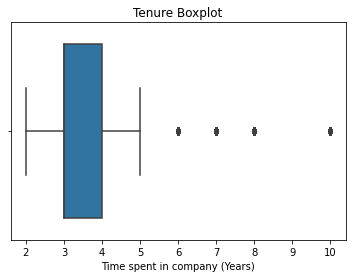

In [37]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x=df_cleaned['time_spend_company'])
plt.title("Tenure Boxplot")
plt.xlabel("Time spent in company (Years)")
plt.show()

In [38]:
# Determine the number of rows containing outliers
q1 = df_cleaned['time_spend_company'].quantile(0.25)
q3 = df_cleaned['time_spend_company'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers_count = len(df_cleaned[(df_cleaned['time_spend_company'] < lower_bound) | (df_cleaned['time_spend_company'] > upper_bound)])
print(f"Number of outliers in 'time_spend_company': {outliers_count}")

Number of outliers in 'time_spend_company': 824


In [39]:
# Get numbers of people who left vs. stayed
print("Counts of employess who stayed vs. left: ")
print(df_cleaned['left'].value_counts())
# Get percentages of people who left vs. stayed
print(df_cleaned['left'].value_counts(normalize= True)*100)

Counts of employess who stayed vs. left: 
0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

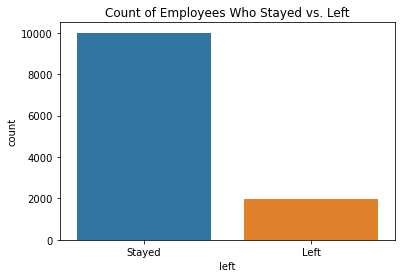

In [40]:
# Create a plot as needed
sns.countplot(x='left', data = df_cleaned)
plt.title('Count of Employees Who Stayed vs. Left')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

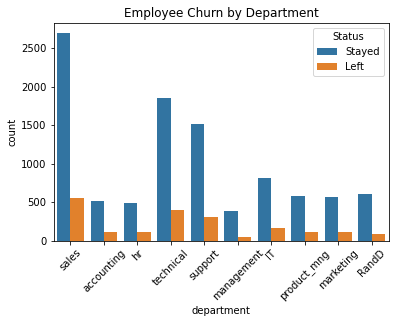

In [41]:
# Create a plot as needed
sns.countplot(x='department', hue = 'left', data = df_cleaned)
plt.title('Employee Churn by Department')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Stayed', 'Left'])
plt.show()

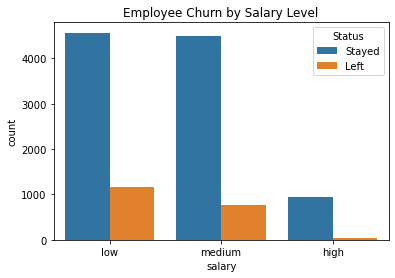

In [42]:
# Create a plot as needed
sns.countplot(x='salary', hue='left', data=df_cleaned, order=['low', 'medium', 'high'])
plt.title('Employee Churn by Salary Level')
plt.legend(title='Status', labels=['Stayed', 'Left'])
plt.show()

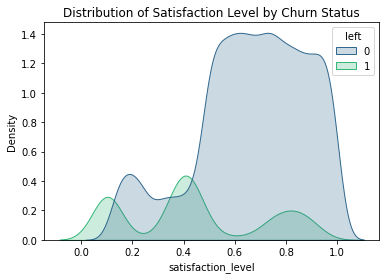

In [43]:
# Create a plot as needed
sns.kdeplot(data=df_cleaned, x='satisfaction_level', hue='left', fill=True, palette='viridis')
plt.title('Distribution of Satisfaction Level by Churn Status')
plt.show()

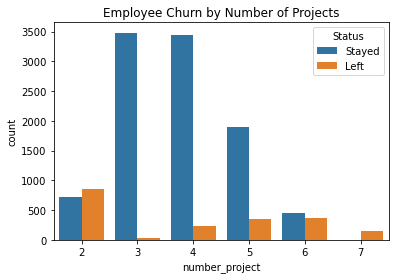

In [53]:
# Create a plot as needed
sns.countplot(x='number_project', hue='left', data=df_cleaned)
plt.title('Employee Churn by Number of Projects')
plt.legend(title='Status', labels=['Stayed', 'Left'])
plt.show()

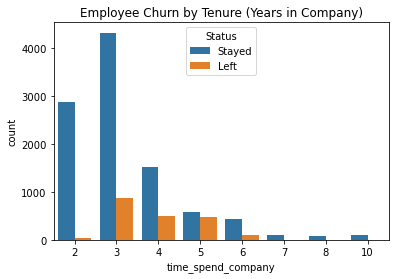

In [54]:
# Create a plot as needed
sns.countplot(x='time_spend_company', hue='left', data=df_cleaned)
plt.title('Employee Churn by Tenure (Years in Company)')
plt.legend(title='Status', labels=['Stayed', 'Left'])
plt.show()

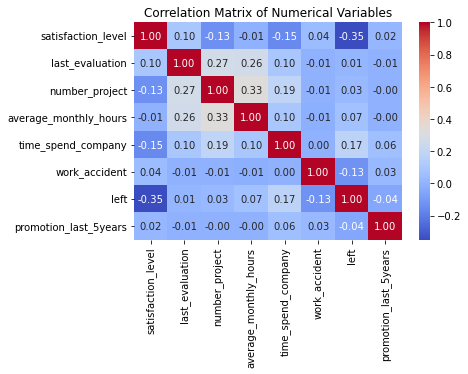

In [55]:
# Create a plot as needed
numeric_cols = df_cleaned.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Insights

Satisfaction: The data clearly shows that employees with the lowest satisfaction levels are also the most likely to leave.

Work Hours: Attrition is highest at both extremes—those who are consistently overworked and those who feel underutilized.

The Obvious Link: The heatmap confirms what we expected: dissatisfaction is directly tied to higher attrition risk. It’s not surprising, but it reinforces where we need to focus.

### Identify the type of prediction task.

We’re trying to predict if an employee will stay or leave. Two possible outcomes → stay (0) or leave (1).

### Identify the types of models most appropriate for this task.

For this kind of problem, Logistic Regression is a good starting point. But tree-based models like Random Forest or XGBoost usually do better. We used Random Forest because it’s accurate and not too hard to explain.

### Modeling

In [45]:
df_model = df_cleaned.copy()
df_encoded = pd.get_dummies(df_model, columns=['department', 'salary'], drop_first=True)
print("Data after encoding:")
df_encoded.head()

Data after encoding:


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [46]:
y = df_encoded['left']
X = df_encoded.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [48]:
y_pred = rf_model.predict(X_test)

Confusion Matrix:


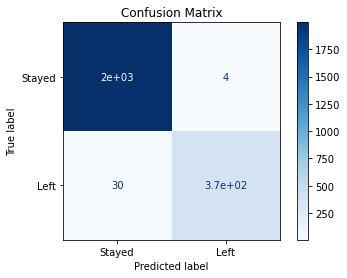

In [49]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Left'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [50]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

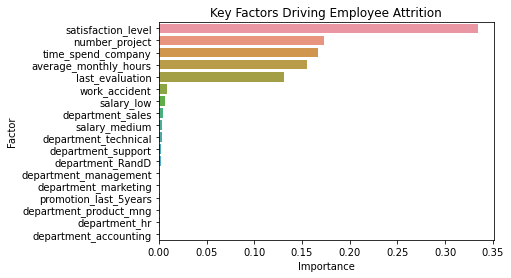

In [51]:
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Key Factors Driving Employee Attrition')
plt.xlabel('Importance')
plt.ylabel('Factor')
plt.show()

In [52]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.99      1.00      0.99      2001
        Left       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

### Summary of model results

Our Random Forest model did an excellent job at predicting who might leave.

Overall accuracy: 99%

Recall for employees who left: 92% → we were able to catch most of the people who were at risk of leaving.

Precision for employees who left: 99% → very few false alarms, so HR can trust the alerts.

In short, the model is both accurate and reliable, making it a strong tool to help HR act before employees actually quit.

### Conclusion, Recommendations, Next Steps
The model and the analysis confirm that employee attrition isn’t random. It’s driven by a few core, measurable factors. Based on these findings, here are the top recommendations for the HR department:

1.  **Focus on the Unhappy but High-Performing:**
    * **Finding:** Many employees who leave have low satisfaction but high performance scores.
    * **Recommendation:** Implement a system to flag these "unhappy achievers." A simple, proactive check-in from a manager could make all the difference.

2.  **Manage Workload Smarter:**
    * **Finding:** Having too many (6+) or too few (2) projects is a major churn indicator, suggesting both burnout and under-utilization are risks.
    * **Recommendation:** HR should work with managers to ensure project loads are balanced, especially for top performers.

3.  **Create a Growth Path for Mid-Tenure Employees:**
    * **Finding:** The 3-5 year mark is a critical flight risk period, as shown by the data.
    * **Recommendation:** Introduce targeted mentorship and career development programs for this group to show them a clear future within the company.